## GRIP - THE SPARKS FOUNDATION
[DATA SCIENCE & BUSINESS ANALYTICS]

### - REDDI SRIJA R

### TASK #2: CLUSTERING USING UNSUPERVISED ML

### Objective: To predict the optimum number of clusters from the Iris dataset and visually represent it.

### Importing necessary librabries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as grh
from sklearn.metrics import silhouette_score
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
un_sup = pd.read_csv("Task 2.csv")

In [3]:
un_sup.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
un_sup = un_sup.drop(['Id'],axis=1)

In [5]:
un_sup.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
un_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
un_sup.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Correlarion graph using Heatmaps of Seaborn Package

<AxesSubplot:>

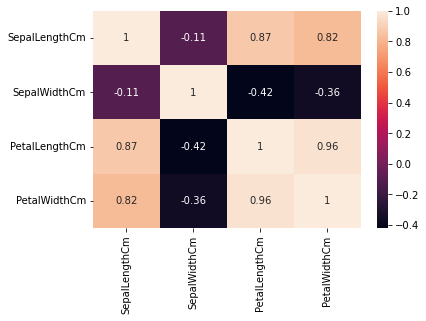

In [8]:
cor_grh = un_sup.corr()
sns.heatmap(cor_grh, annot=True)

### Scatter plot to observe relationship between variables

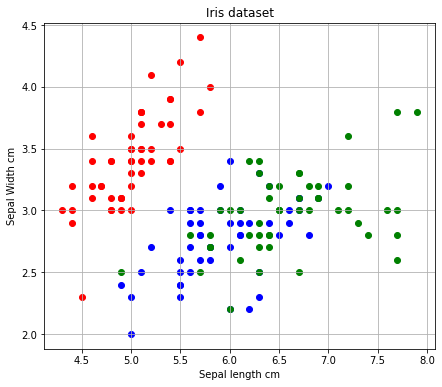

In [9]:
setosa = un_sup[un_sup.Species == "Iris-setosa"]
versicolor = un_sup[un_sup.Species == "Iris-versicolor"]
virginica = un_sup[un_sup.Species == "Iris-virginica"]

fig, sub = grh.subplots()
fig.set_size_inches(7,6)

sub.scatter(setosa['SepalLengthCm'],setosa['SepalWidthCm'], color='red')
sub.scatter(versicolor['SepalLengthCm'],versicolor['SepalWidthCm'], color='blue')
sub.scatter(virginica['SepalLengthCm'],virginica['SepalWidthCm'], color='green')

sub.set_xlabel("Sepal length cm")
sub.set_ylabel("Sepal Width cm")
sub.grid()
sub.set_title("Iris dataset")
grh.show()

### Considering first two columns as main features to train the model

In [10]:
X = un_sup.iloc[:, 0:2].values

### Elbow method 
- to decide number of clusters

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known

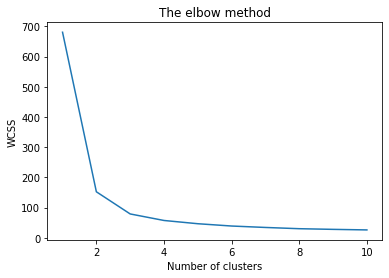

In [11]:
x = un_sup.iloc[:, 0:4].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

grh.plot(range(1, 11), wcss)
grh.title('The elbow method')
grh.xlabel('Number of clusters')
grh.ylabel('WCSS') 
grh.show()

### Model Fitting - K Means clustering

In [12]:
k_means_X = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
un_sup['cluster'] = k_means_X.fit_predict(X)

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [13]:
un_sup.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


### Creating centroid for each cluster

In [14]:
centroids = k_means_X.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

#adding these into dataframe
un_sup['cen_x'] = un_sup.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
un_sup['cen_y'] = un_sup.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

# mapping the colors
colour = ['#DF2020', '#81DF20', '#2095DF']
un_sup['Color'] = un_sup.cluster.map({0:colour[0], 1:colour[1], 2:colour[2]})

### 3D visualization of scatter plot 

C:\Users\Radha Krishna\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


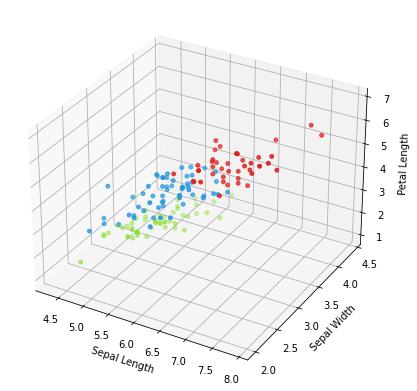

In [15]:
colour = ['#DF2020', '#81DF20', '#2095DF']

Y = un_sup.iloc[:, 0:3].values

k_means_Y = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
un_sup['cluster'] = k_means_Y.fit_predict(Y)

un_sup['Color'] = un_sup.cluster.map({0:colour[0], 1:colour[1], 2:colour[2]})

viz = grh.figure(figsize=(23,10))
rs = viz.add_subplot(131, projection = '3d')

rs.scatter(un_sup.SepalLengthCm, un_sup.SepalWidthCm, un_sup.PetalLengthCm, c = un_sup.Color, s = 15)
rs.set_xlabel('Sepal Length')
rs.set_ylabel('Sepal Width')
rs.set_zlabel('Petal Length')
grh.show()

### Visualization of clusters along with centroids

    Cluster 1: Red: Iris-virginica
    Cluster 2: Green: Iris-versicolour
    Cluster 3: Blue: Iris-setosa
    Triangle symbol represents 'centroids'

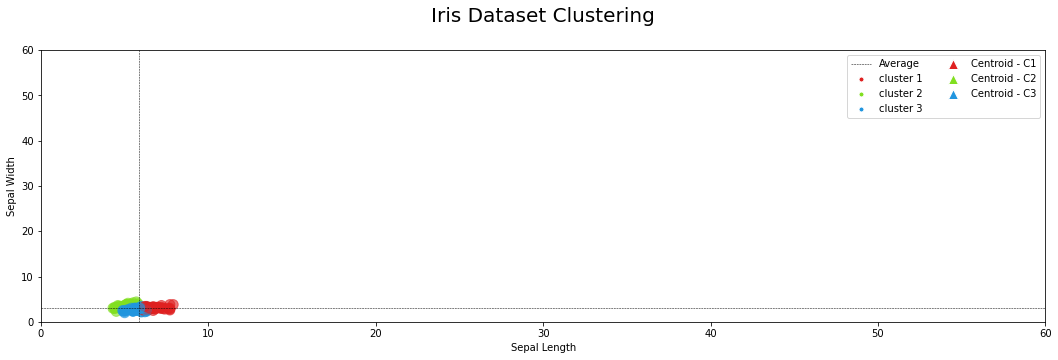

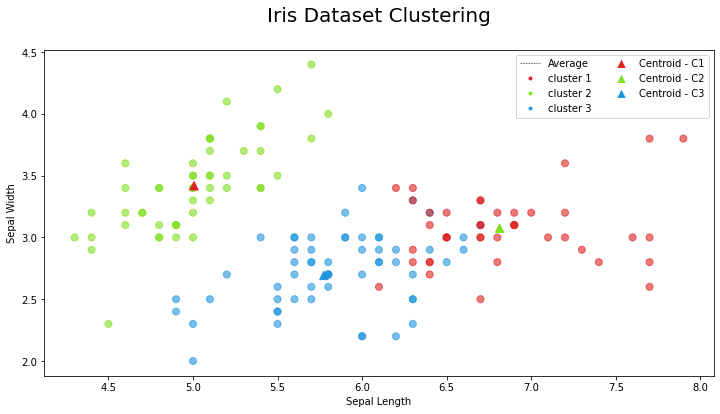

In [16]:
from matplotlib.lines import Line2D
viz, rs = grh.subplots(1, figsize=(18,5))
grh.scatter(un_sup.SepalLengthCm, un_sup.SepalWidthCm, c=un_sup.Color, alpha=0.6, s=100)
grh.plot([un_sup.SepalLengthCm.mean()]*2, [0,200], color='black', lw=0.5, linestyle='--')
grh.xlim(0,60)
grh.plot([0,200], [un_sup.SepalWidthCm.mean()]*2, color='black', lw=0.5, linestyle='--')
grh.ylim(0,60)

legend_elements = [Line2D([0], [0], color='black', lw=0.5, linestyle='--', label='Average')]

cluster_leg = [Line2D([0], [0], marker='o', color='w', label='cluster {}'.format(i+1), 
                      markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colour)]

cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colour)]

legend_elements.extend(cluster_leg)
legend_elements.extend(cent_leg)
grh.legend(handles=legend_elements, loc='upper right',ncol=2)
grh.title('Iris Dataset Clustering\n', loc = 'center', fontsize=20)
grh.xlabel('Sepal Length')
grh.ylabel('Sepal Width')
grh.show()

viz, rs = grh.subplots(1, figsize=(12,6))
grh.legend(handles=legend_elements, loc='upper right',ncol=2)
grh.scatter(un_sup.SepalLengthCm, un_sup.SepalWidthCm, c=un_sup.Color, alpha=0.6, s=50)
grh.scatter(cen_x, cen_y, marker='^', c=colour, s=70)
grh.title('Iris Dataset Clustering\n', loc = 'center', fontsize=20)
grh.xlabel('Sepal Length')
grh.ylabel('Sepal Width')
grh.show()

### Visualization of working of k-means clustering algorithm

Text(0, 0.5, 'Sepal Width')

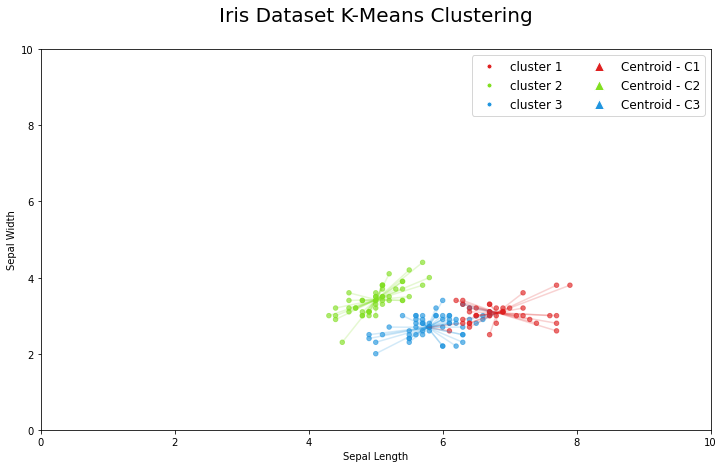

In [17]:
viz, rs = grh.subplots(1, figsize=(12,7))

grh.scatter(un_sup.SepalLengthCm, un_sup.SepalWidthCm, c=un_sup.Color, alpha=0.6, s=20)

for idx, val in un_sup.iterrows():
    r = [val.SepalLengthCm, val.cen_x,]
    s = [val.SepalWidthCm, val.cen_y]
    grh.plot(r, s, c=val.Color, alpha=0.2)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colour)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colour)])

grh.legend(handles=legend_elements, loc='upper right', ncol=2, fontsize=12)
grh.xlim(0,10)
grh.ylim(0,10)
grh.title('Iris Dataset K-Means Clustering\n', loc='center', fontsize=20)
grh.xlabel('Sepal Length')
grh.ylabel('Sepal Width')

### Evaluation measures

### Silhouette score 
- to evaluate the quality of clusters - between [-1, 1]

In [18]:
score = silhouette_score(x, kmeans.labels_, metric='euclidean')
print('Silhoueteer score: %.3f' % score)

Silhoueteer score: 0.334


In [19]:
import time
start = time.time()
x = 0
for r in range(1000000):
    x += 1
time.sleep(3)
end = time.time()
execution = end - start
print("Execution time:", execution, "seconds." )

Execution time: 3.1618056297302246 seconds.


### THANK YOU!